# Imports

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Data Files

In [135]:
import glob


def cheb(n: int, x: float | np.ndarray) -> float | np.ndarray:
    return np.cos(n * np.arccos(x))


# Find all text files starting with "out"
fileListData = glob.glob("out*.txt")

# Organize the data into arrays
dataArr = []
for file in fileListData:
    _, L, t, w, NCheb = file.split("-")
    L, t, w, NCheb = int(L), float(t), float(w), int(NCheb[:-4])
    
    # Load the file as an array of floats
    dataNum = np.genfromtxt(file, dtype=float)
    dataNum = dataNum ** 2

    # Store
    dataArr += [(L, w/t, NCheb, dataNum.T)]


# Find all text files starting with "time"
fileListTime = glob.glob("time*.txt")

# Get time data
ttArr, rrArr, uuArr = [], [], []
for fileName in fileListTime:
    with open(fileName, "r") as file:
        text = file.read().split("\n")
        text = [item for item in text if len(item) > 2]

    tt, rr, uu = [], [], []
    # Timing with time function
    # for index in range(len(text) // 4):
    #     index *= 4
    #     tt += [int(text[index].split("=")[-1])]
    #     rr += [float(text[index + 1].split("m")[-1][:-1])]
    #     uu += [float(text[index + 2].split("m")[-1][:-1])]

    # Timing itself
    for item in text:
        item = item.split()
        tt += [int(item[5][:-1])]
        rr += [float(item[6])]

    ttArr += [tt]
    rrArr += [rr]
    uuArr += [uu]

ttArr = np.array(ttArr)
rrArr = np.array(rrArr)
uuArr = np.array(uuArr)

# Statistics

In [136]:
def stats(dataTuple: tuple):
    # Extract the data
    L, wt, NCheb, data = dataTuple

    # Compute normalization
    normalization = np.sum(data, axis=1, keepdims=True)

    # Compute mean and variance
    data = data / np.sum(data, axis=1, keepdims=True)
    
    mm = np.sum(np.arange(L) * data, axis=1)
    mm2 = np.sum(np.arange(L) ** 2 * data, axis=1)
    vv = mm2 - mm**2

    # Show result at the initial state as a sanity check
    print(f"For t = 0 we have average = {mm[0]:.3f} and variance = {vv[0]:.3f}")
    print(f"Normalization constant average = {np.average(normalization):.3f} and variance = {np.var(normalization):.3f}")

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
    fig.suptitle(f"Statistics of the Wave function for L={L}, wt={wt}, NCheb={NCheb}")
    
    # Plot mean
    axes[0].plot(mm, label="Mean", color='b')
    axes[0].set_ylabel("Mean")
    axes[0].set_xlabel("Timestep")
    axes[0].legend()
    
    # Plot variance
    axes[1].plot(vv, label="Variance", color='r')
    axes[1].set_ylabel("Variance")
    axes[0].set_xlabel("Timestep")
    axes[1].legend()
    
    # Show plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# GIF

In [ ]:
# Imports
from matplotlib import animation
from matplotlib.animation import PillowWriter

from PIL import Image


#  Update rule for the video
timestep = 0
def update(frame, line, ax, data):
    global timestep

    # Update time
    timestep += 1
    ax.set_title(f"Wave function at time step {timestep}.")

    # Update line data
    line.set_ydata(np.abs(data[frame, :]))

    return line,


# Make the video
def makeGIF(dataTuple: tuple, maxFrames: int = 100):
    global timestep

    # Extract the data
    L, wt, NCheb, data = dataTuple

    # Use only every skip item
    skip = int(len(data[:, 0]) / maxFrames + 1)
    data = data[0::skip, :]

    # Start the plot
    fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
    ax.grid(True)
    ax.set_title("Wave function at time step 0.")
    ax.set_xlabel("Position along the lattice (n)")
    ax.set_ylabel("Modulus of wave function $|\\psi(n, t)|$")

    # First frame
    x_values = np.arange(0, L)
    line, = ax.plot(x_values, np.abs(data[0, :]), c="b") 

    # Reset timestep
    timestep = 0

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=len(data[:, 0]), fargs=(line, ax, data), interval=100)

    # Save animation
    ani.save(f"wave-{L}-{wt}-{NCheb}.gif", writer="pillow")
    plt.close()

# Results

For t = 0 we have average = 750.000 and variance = 800.000
Normalization constant average = 70.898 and variance = 0.000


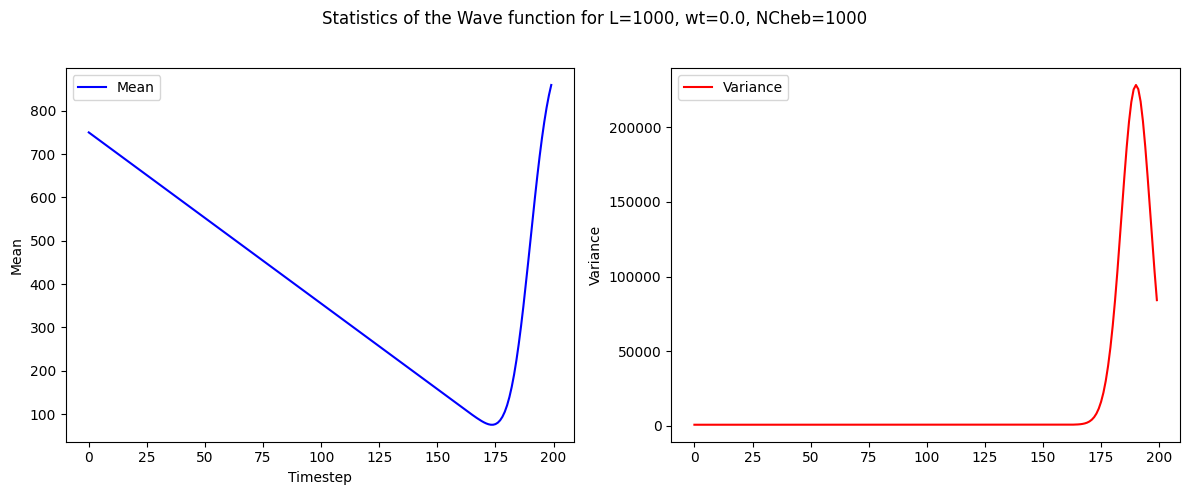

For t = 0 we have average = 751.500 and variance = 803.203
Normalization constant average = 71.040 and variance = 0.000


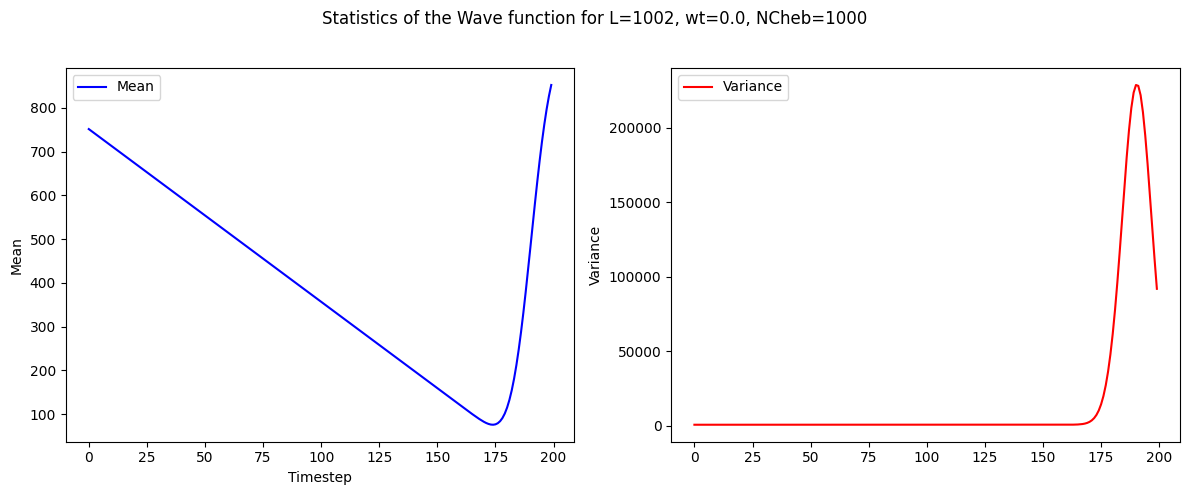

For t = 0 we have average = 753.000 and variance = 806.413
Normalization constant average = 71.182 and variance = 0.000


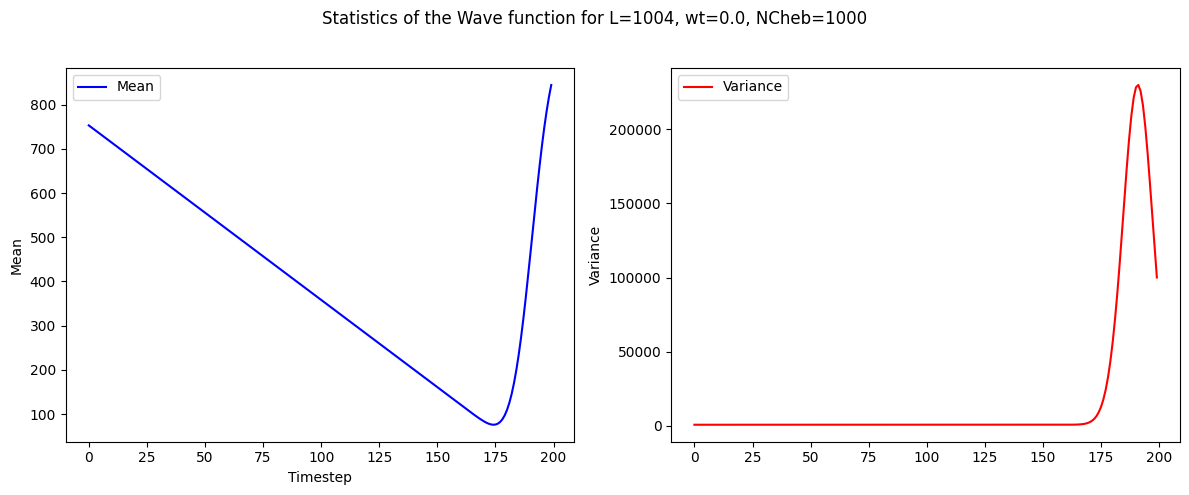

For t = 0 we have average = 756.000 and variance = 812.851
Normalization constant average = 71.465 and variance = 0.000


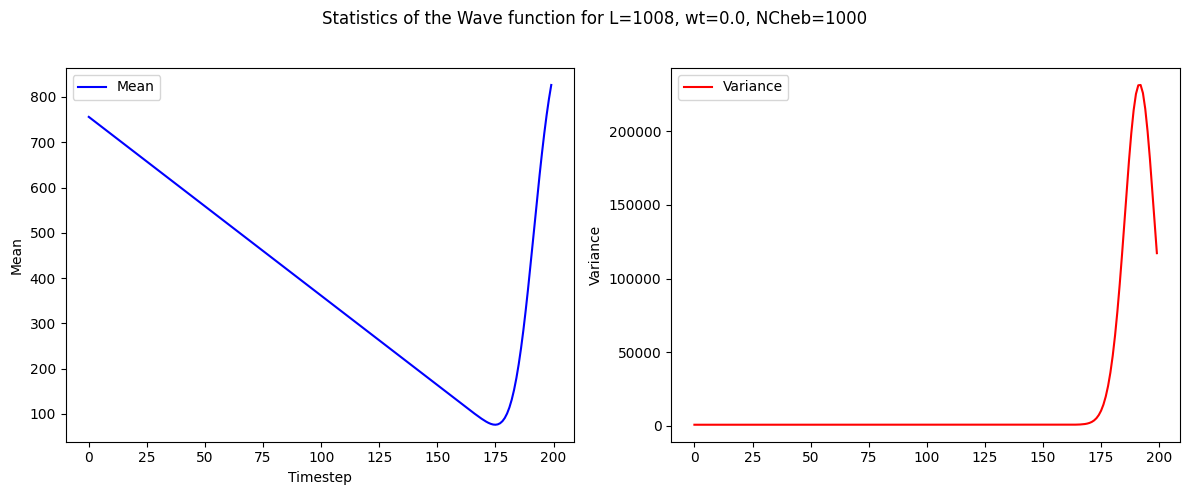

In [138]:
for item in dataArr:
    stats(item)

In [139]:
# See wave functions
for item in dataArr:
    makeGIF(item)

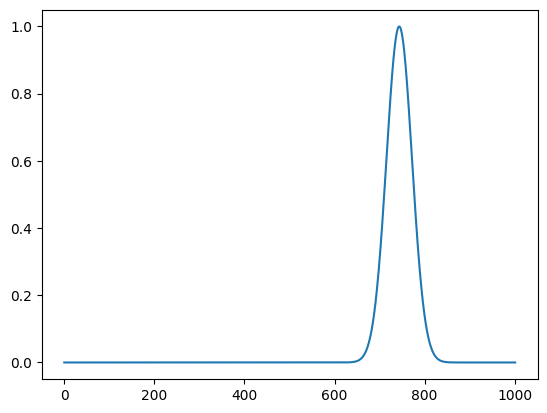

In [140]:
# Debugging
L, wt, NCheb, data = dataArr[1]

plt.plot(np.arange(0, L), data[2, :])

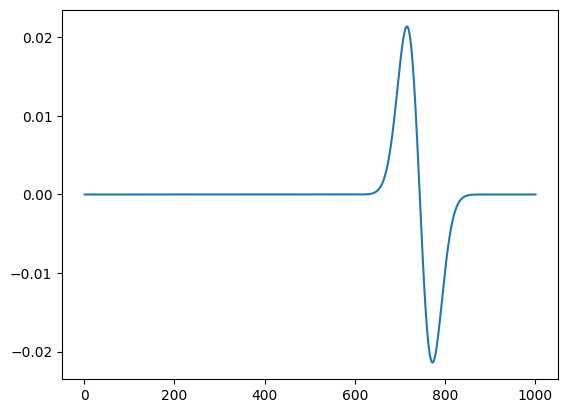

In [141]:
plt.plot(np.arange(1, L), data[2, 1:] - data[2, :L-1])

# Parallelization